# Fantastic wines and how to choose them

## Introduction

While looking for a subject to our project, we came accross a wine review dataset on Kaggle. Some questions came out of our mind such as:
- What makes a good wine ?
- Where is the most expensive wine from ?
- What is the country that export the most wines ?
- What is the consumption pattern of wine by country ?

Besides, we all have faced the situation of being in front of the wine shelf of the supermarket trying to choose a bottle of wine for the party or the diner we have been invited to. And each time you struggle to choose a good wine so people who will taste it will congratulate your choice.

Hence this analysis tries to answer the above questions but also aims at giving some tips to select a good wine for the next time you will have to choose one.

## Data

### Sources

To run this analysis, a dataset of wine reviews from 2017 was available on Kaggle (https://www.kaggle.com/zynicide/wine-reviews). Also the following web page (http://www.worldstopexports.com/wine-exports-country/) was scrapped to get wine export data.

We also got data from the API of global wine score (https://api.globalwinescore.com/globalwinescores/latest/) but the data gathered was limited to the top hundred wines referenced by country and most of the information was already present in the kaggle datasets. Consequently, this source was dropped.

### Cleaning & limitations
The dataset was well fed with 120 000 unique values. After filtering and removing the NaNs, 110 000 values remained wich represents around 90% of the original dataset.

Vintage had to be extracted from the wine "title".

While cleaning data we agreed on removing some location columns. Then producing data visualization, we found that we might have lost important information. For example in the below map some provinces cannot be located correctly by Tableau so the map is uncomplete:

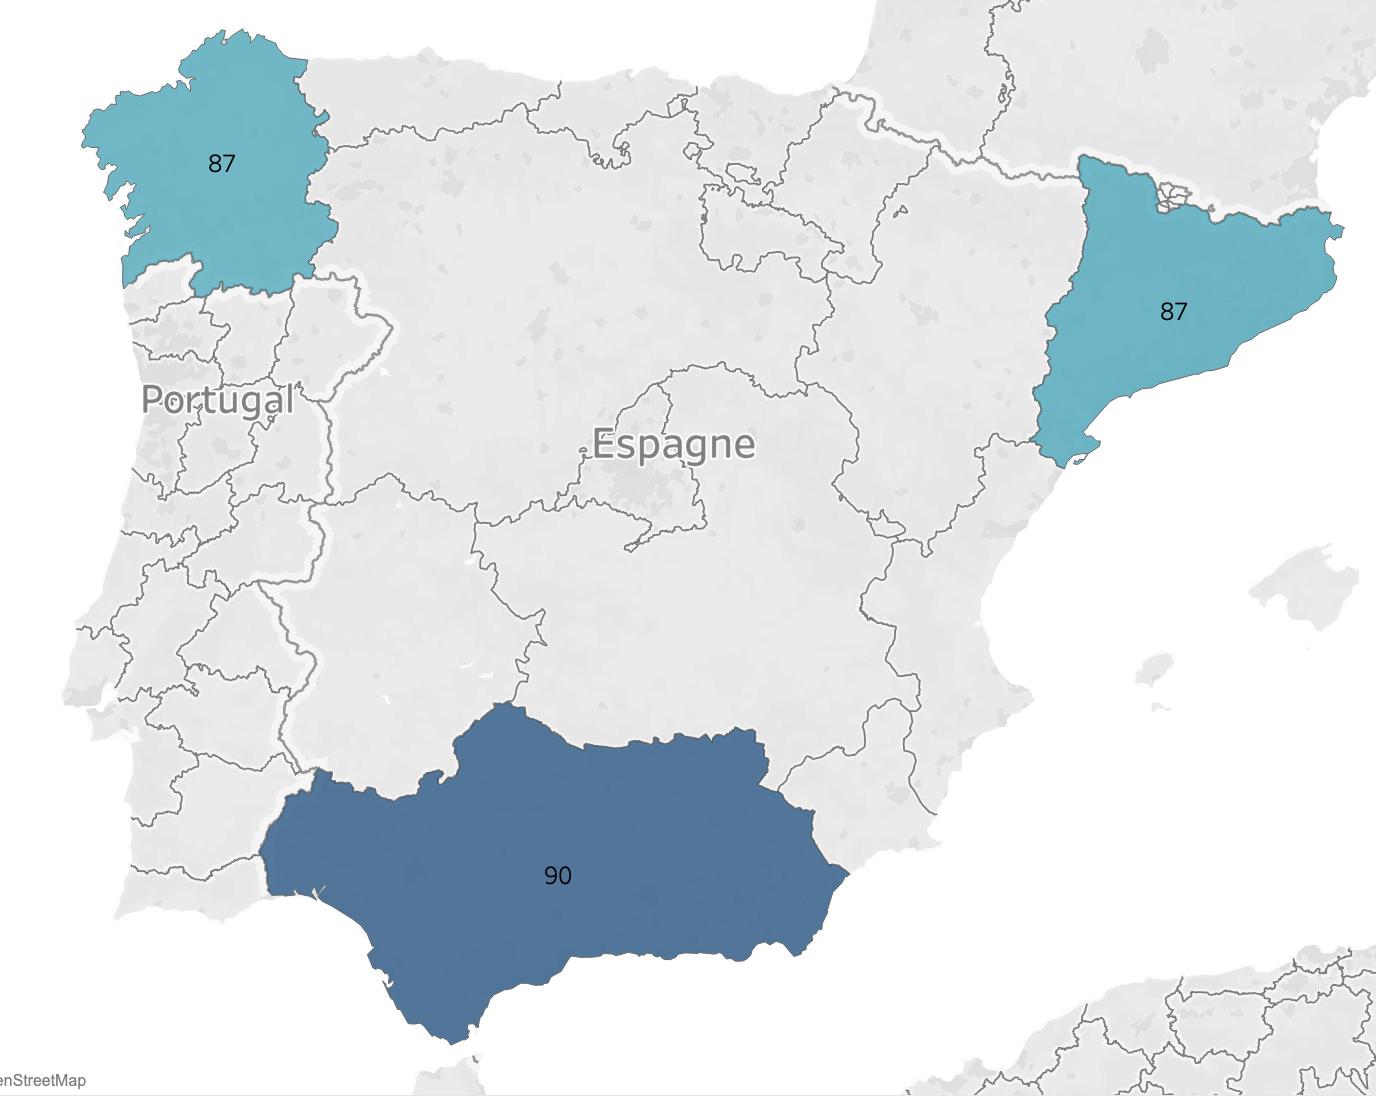



In [1]:
import pandas as pd
wines = pd.read_csv('../data/wines_clean_dataset.csv', index_col=0)
wines[wines["country"]=="Spain"]["province"].value_counts()

Northern Spain     3503
Catalonia          1044
Central Spain       462
Levante             415
Galicia             376
Andalucia           166
Spain Other          57
Spanish Islands      26
Name: province, dtype: int64

Sometimes the description of the column was very poor. If no indication at all, some important information are missing such as price currency.

The wine reviews have some "technical" description from sommeliers. This description was difficult to use in our analysis. Some identification of common words to describe wines was intented. This leave space for improvements and further data transformation to make this information useful.

During the web scraping we got all the information from the website with data from 2018-2019. The web scrapping provides economical data in which variation of the volume exported from one year to another was not of interest for the analysis.

The web scraping data were grouped by countries and this is how it was merge to the rest of the data from the kaggle dataset. The main challenges of the merge was the difference in the number of countries referenced in each data source and the labelling of those countries. An example is given below:

In [19]:
wine_exports = pd.read_csv('../data/wines_webscraping.csv')
index = pd.Index(["kaggle_country","web_scraping_Country"])
pd.DataFrame([wines["country"].describe(),wine_exports['Country'].describe()],index=index)

,count,unique,top,freq
kaggle_country,111537,42,US,50238
web_scraping_Country,149,149,Russia,1


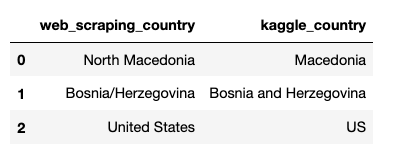

## Questions


### Where is the most expensive wine from ?

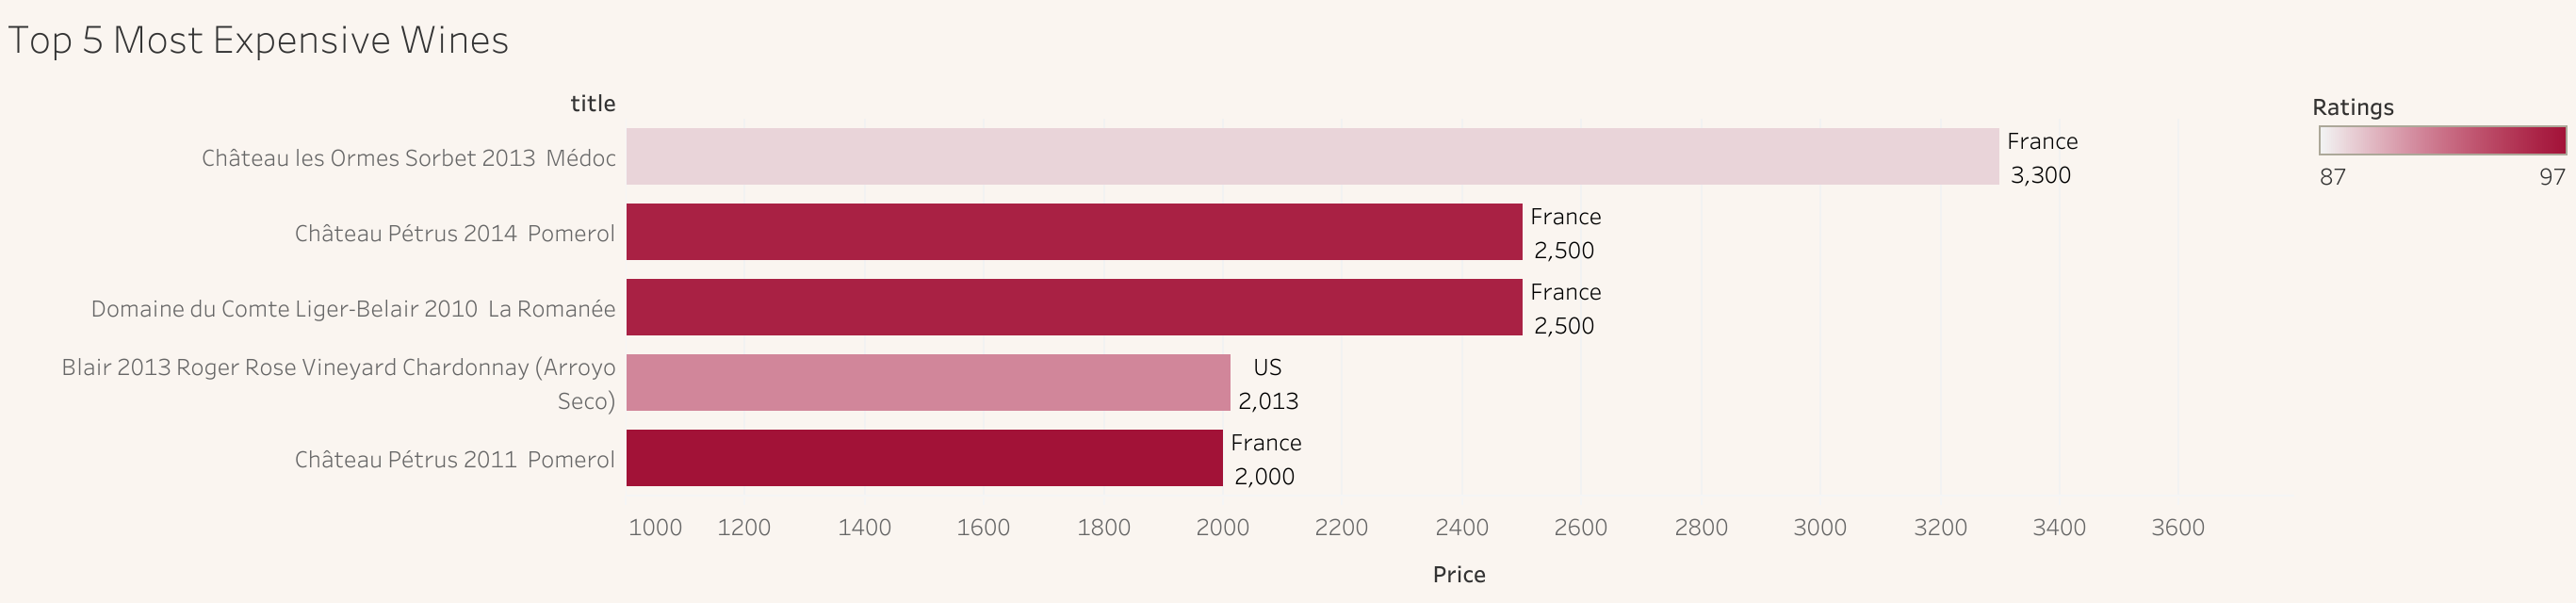

The most expensive wine of the review comes from France. It worth more than 3000 $ ou € and it's not even the best rated !!

### What is the country that export the most wines ?

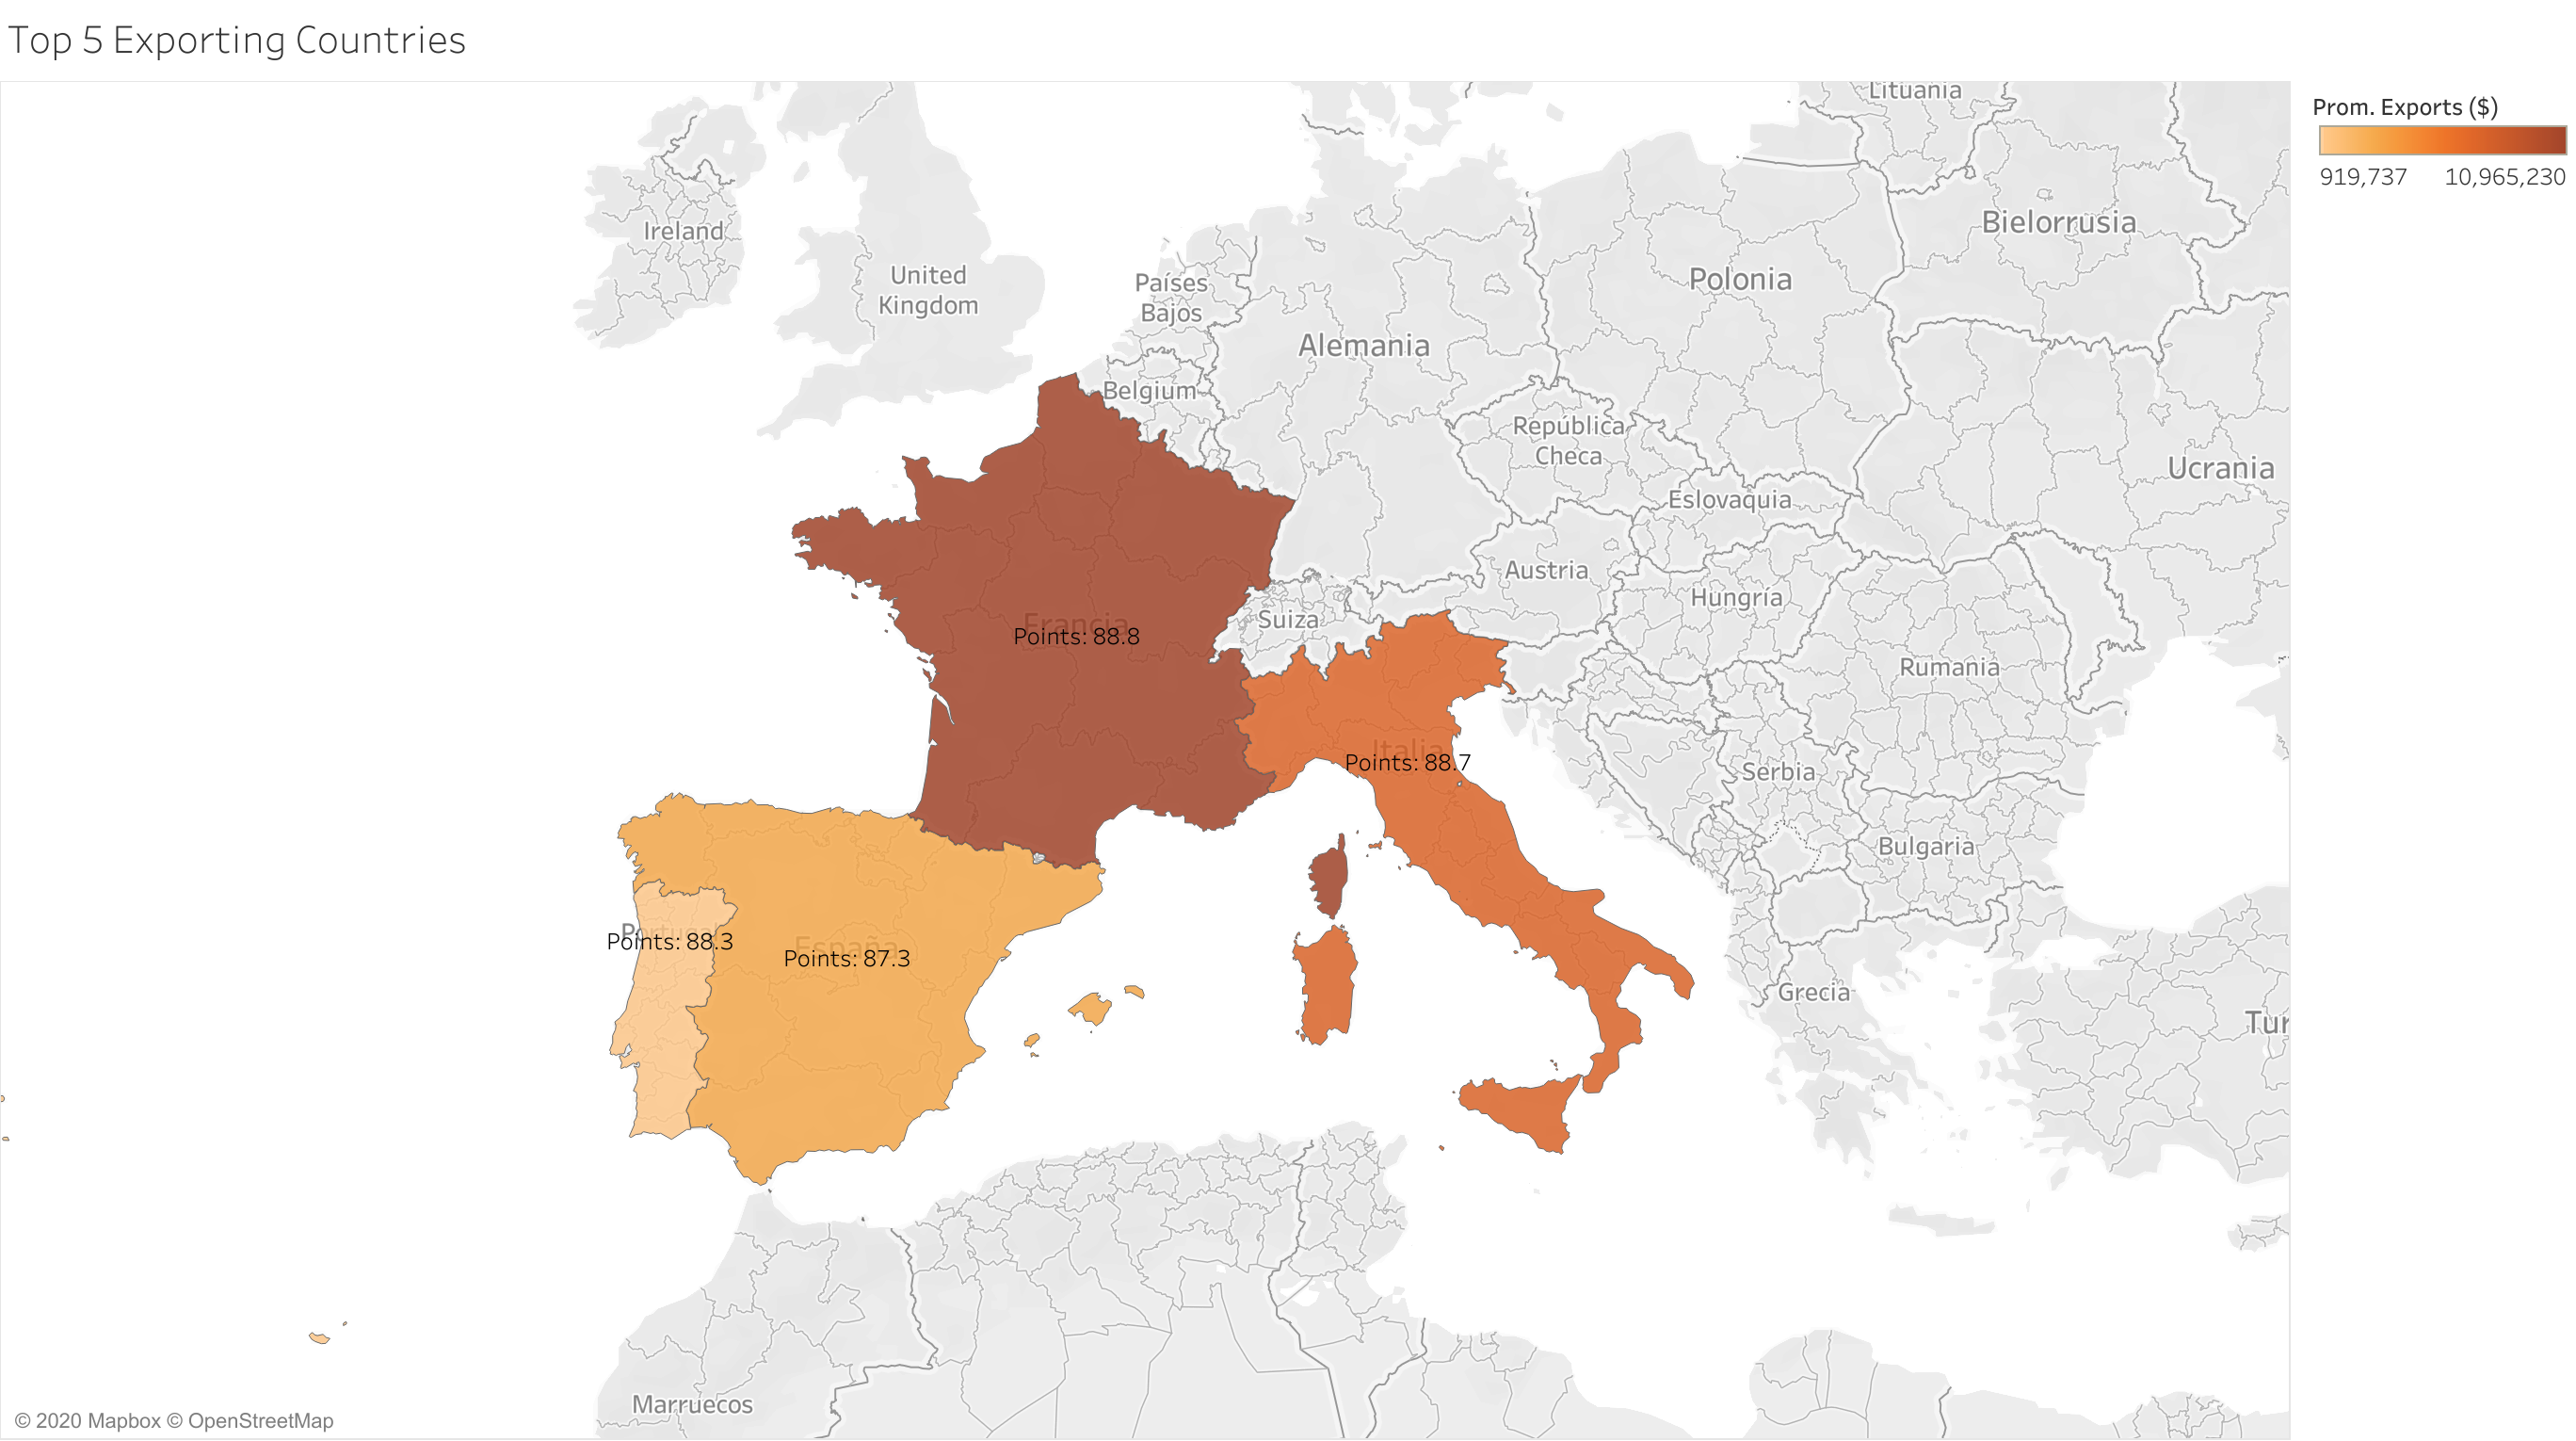
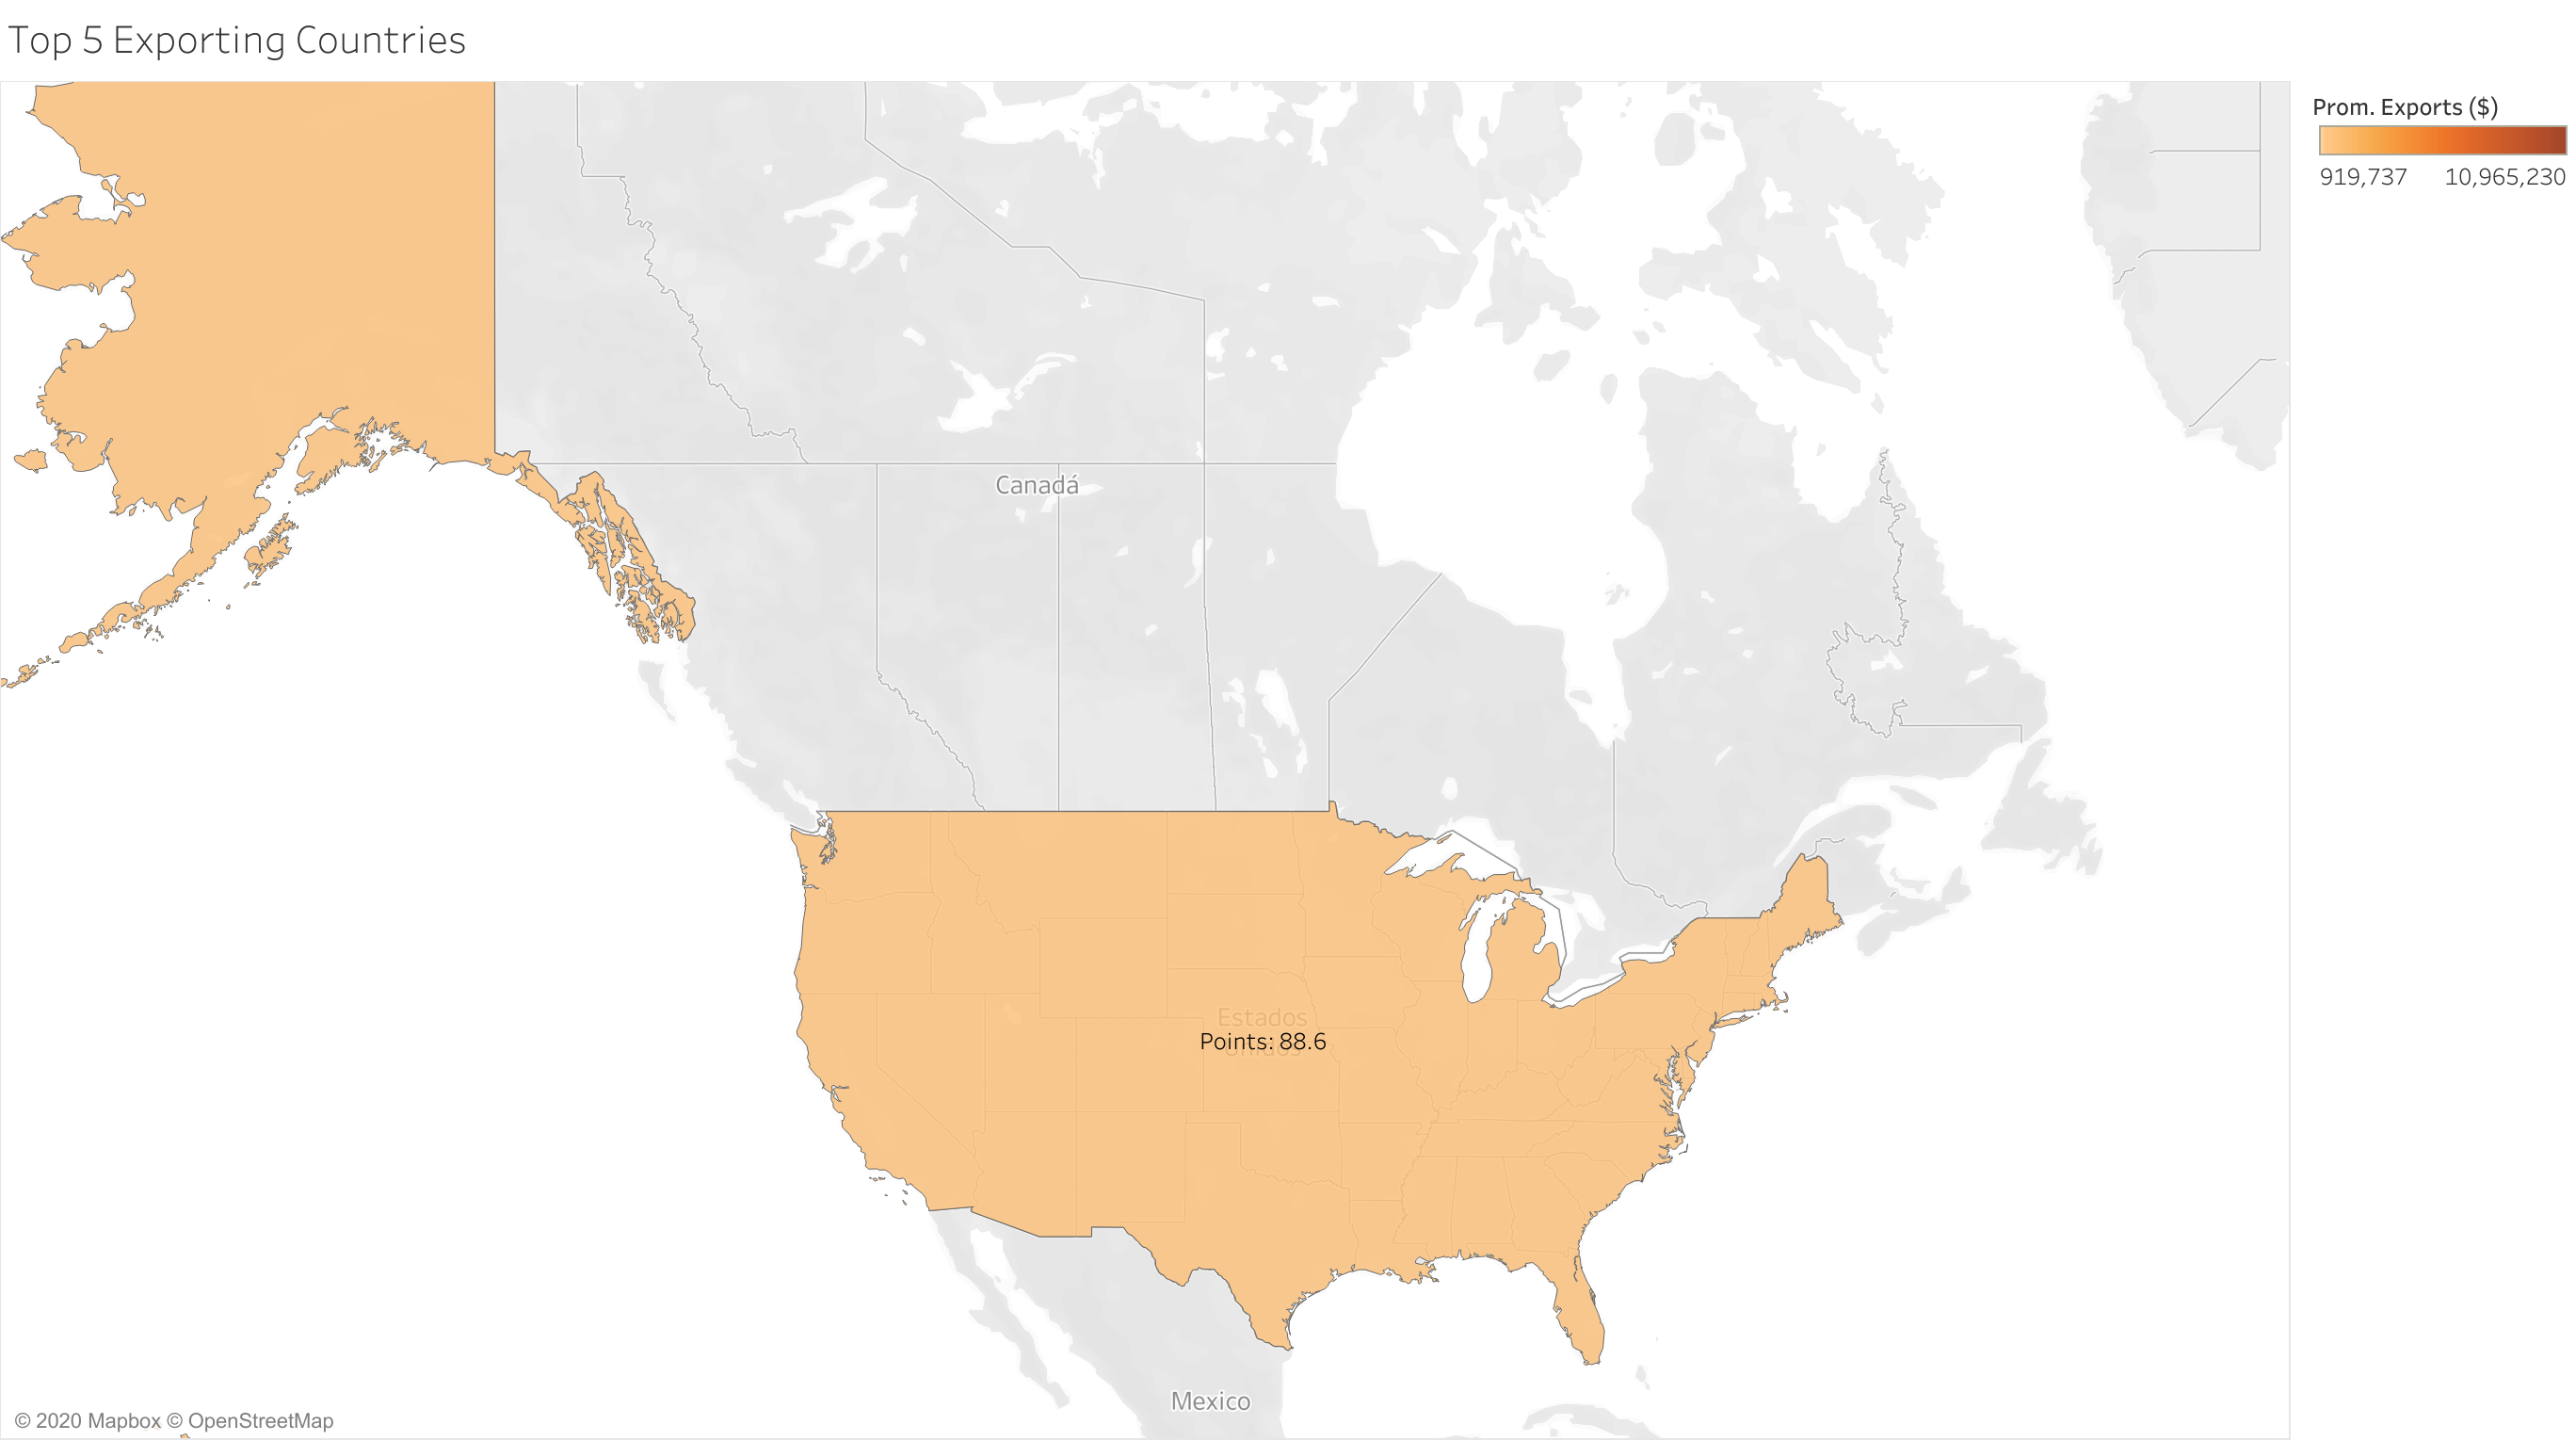

France is also the country that has the most income from wine exportations. This must be due to the volume exported  because the average price of french wines stays in the same level as other european countries such as Italy (graph below).

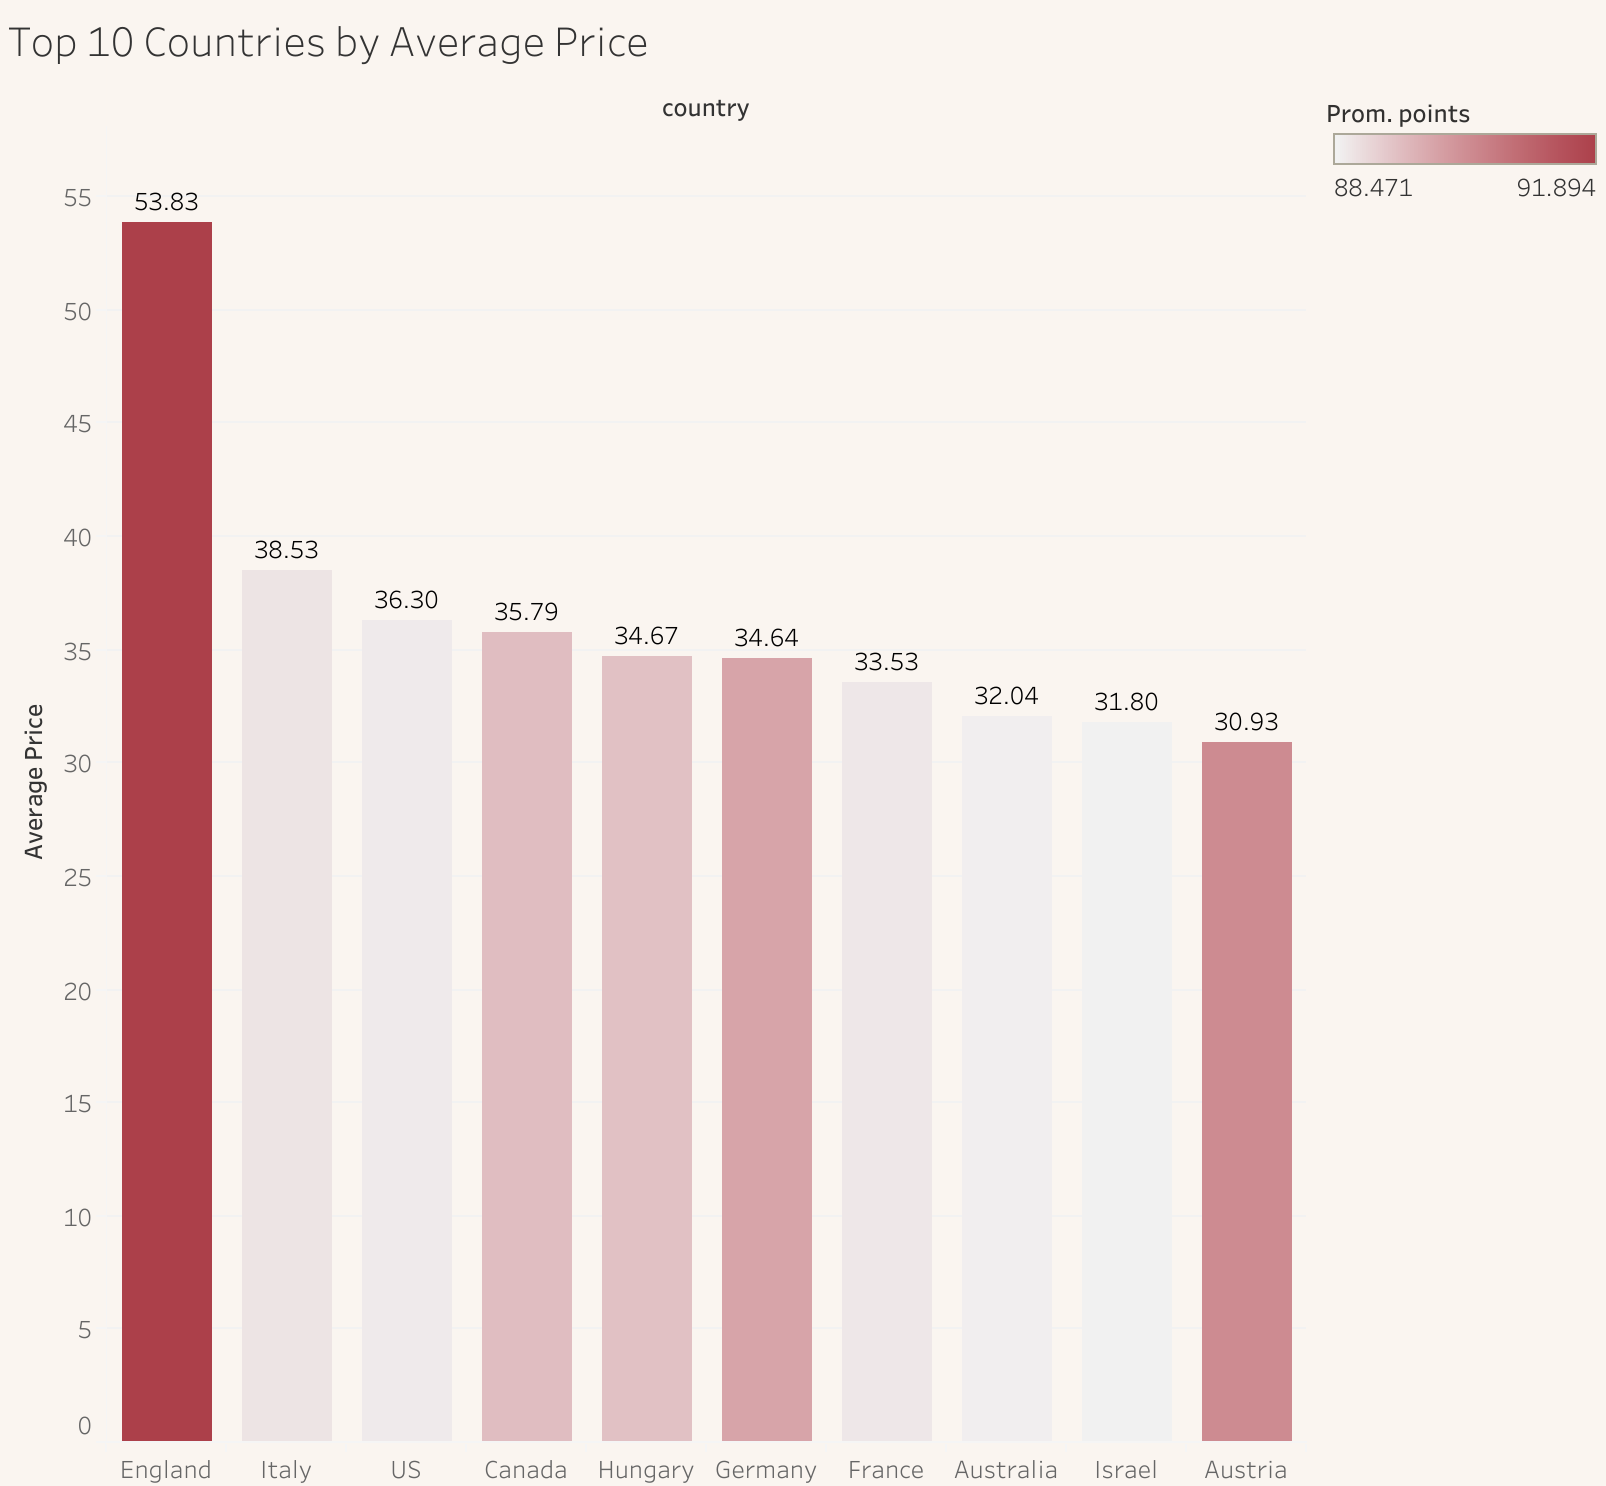

### What is the consumption pattern of wine by country ?

This question stayed without answers as no relevent data were found.

The expected output was to identify the prefered way of wine consumption by country among the listed below for exemple:

- sales of wines in supermarkets
- sales of wines in restaurants
- sales of wines in wineries
- etc

### What makes a good wine ? tips to select a good wine

To answer this question we focused on Spainish wines. Note that the tips given shall allow to identify good wines from obvious information that must be present on the bottle labelling.

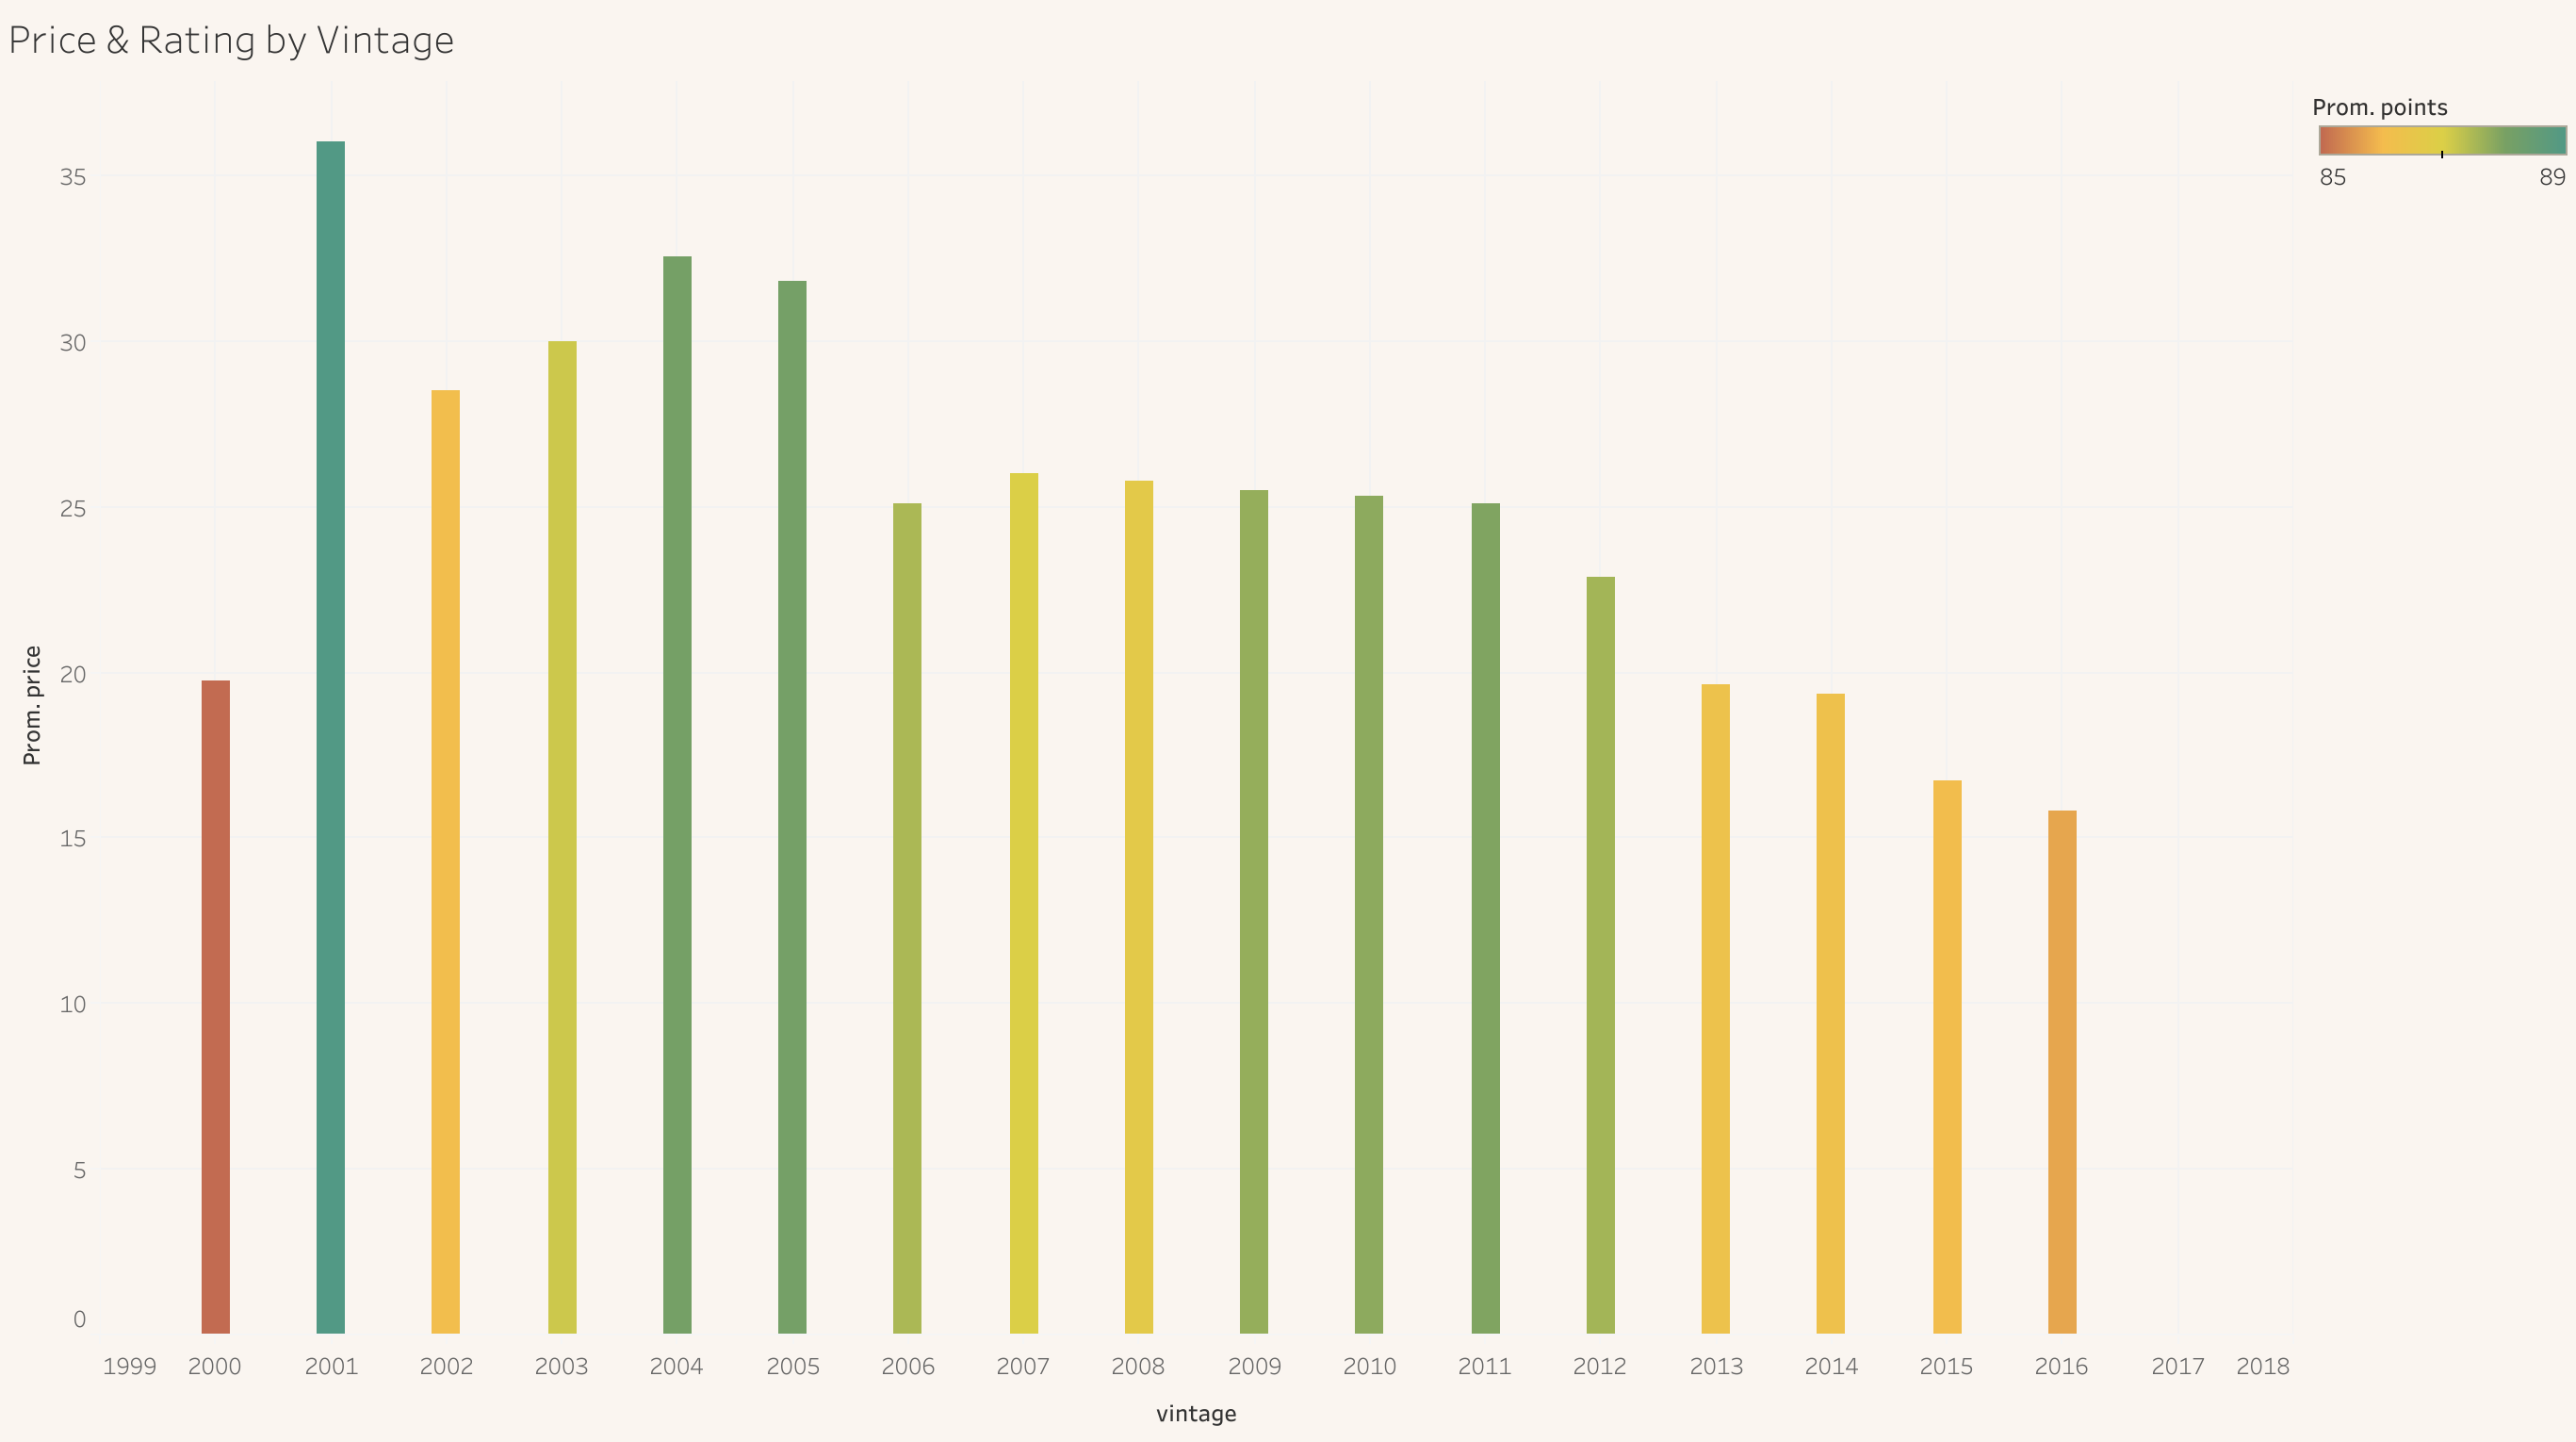

The graph above tells us that to have a good balance between quality and price, it is preferred to select wines which vintage fall between 2009 and 2011.

The graph below shows the graps variety with the highest average point for 3 ranges of price depending on the budget we want to spend on a bottle of wine:

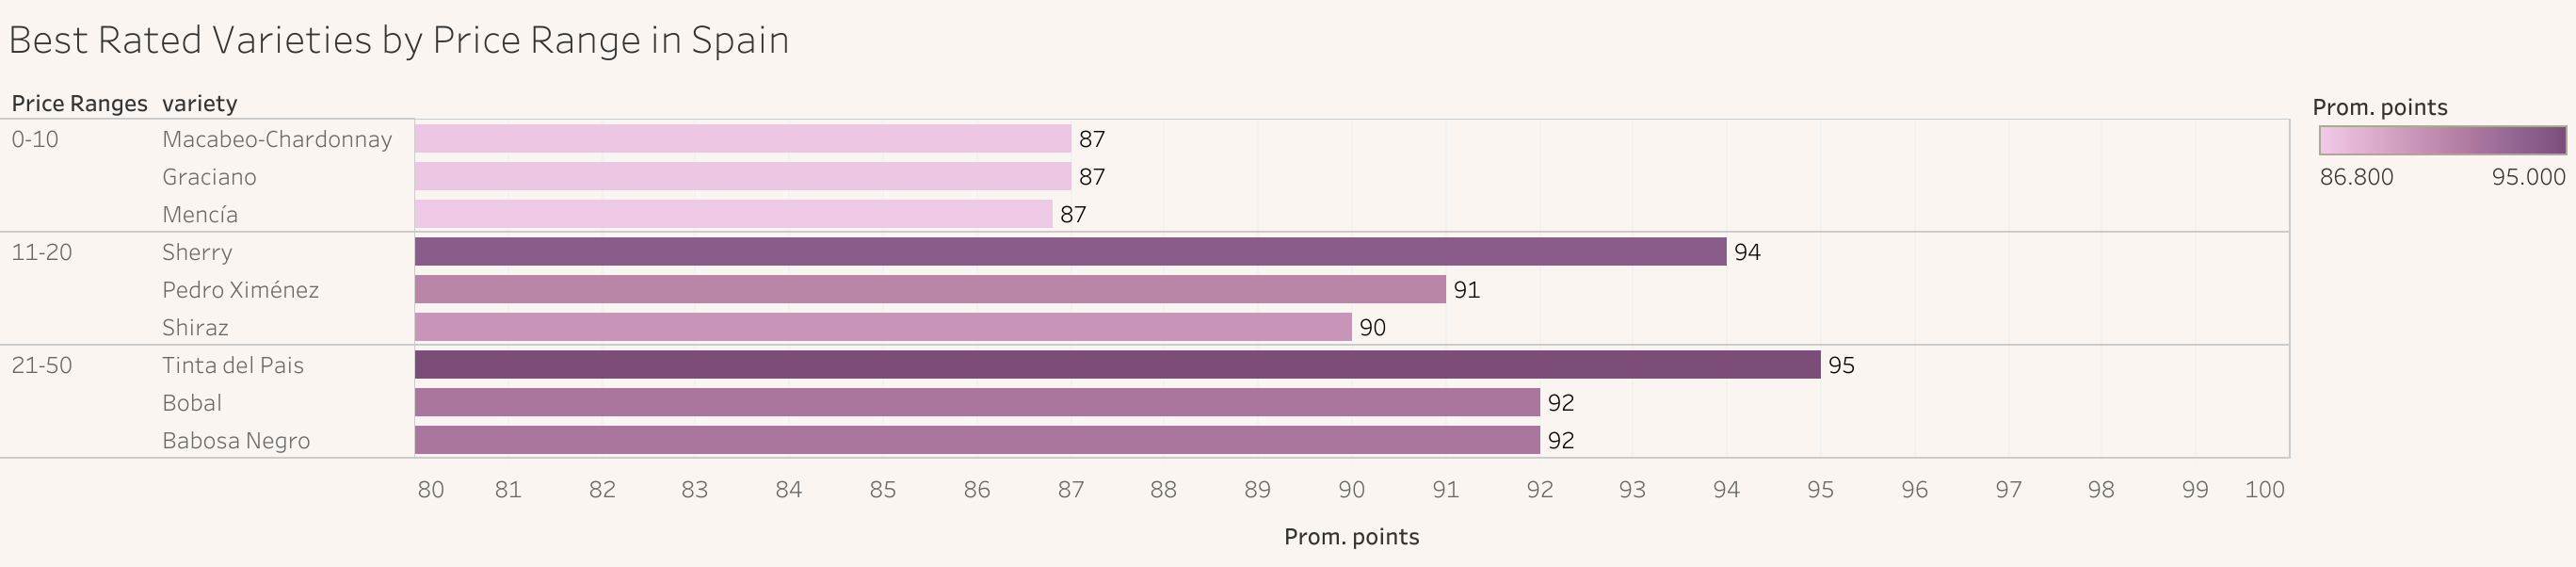

## Insights

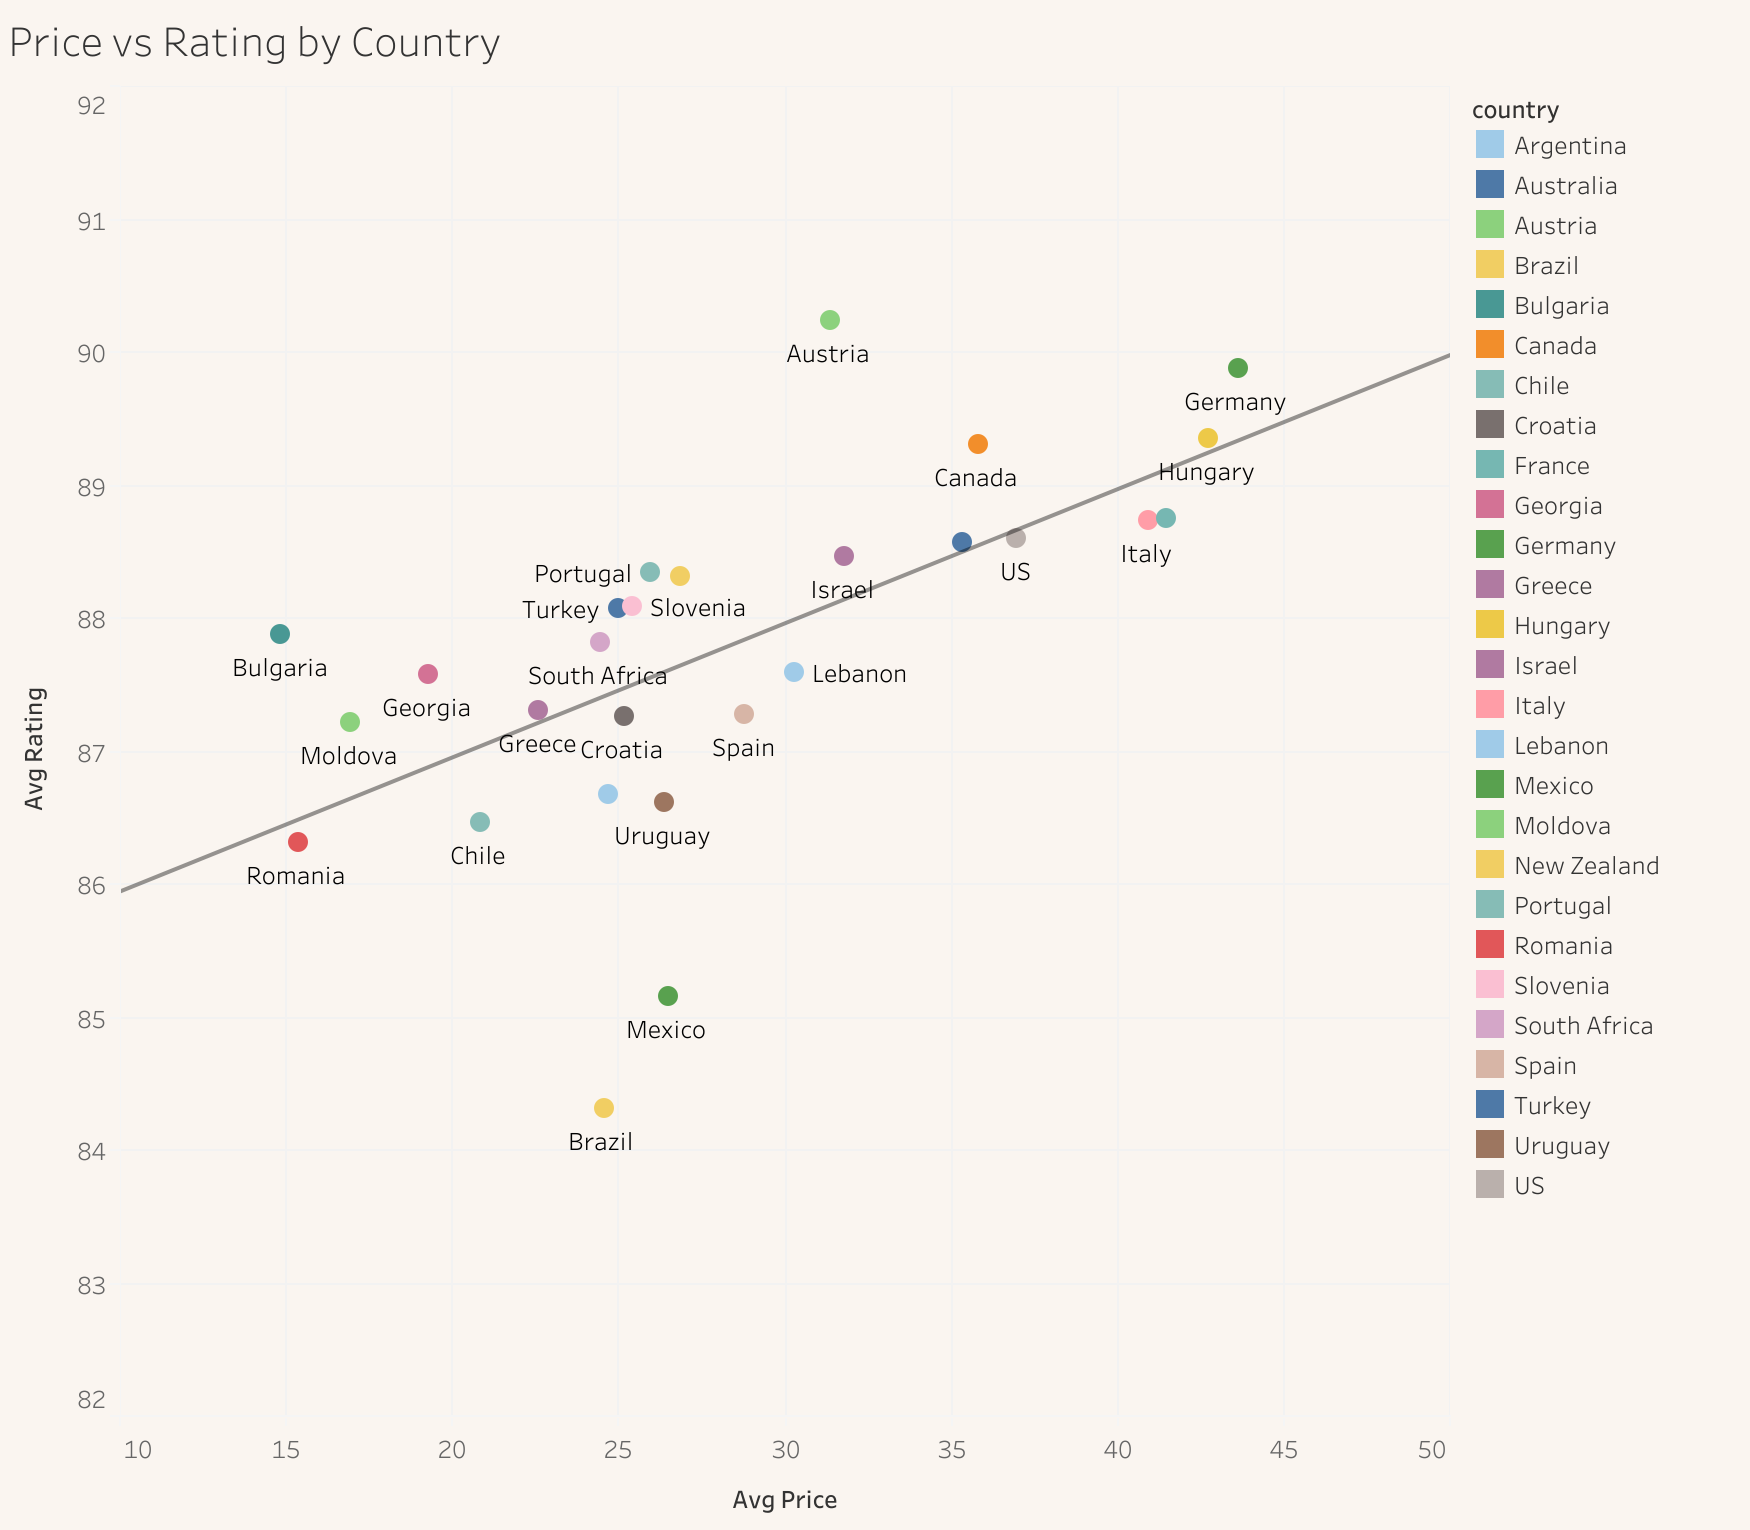



## Further questions and improvements

Transform sommelier descriptions in adjectives qualifying the wine in a matter that wines can be compared through those adjectives and give tips to select wine depending on taste preferred.

Dig deeper in the web to try to answer the consumption pattern by country question.